### Import Packages and Load The Data

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.regularizers import l2
from matplotlib import pyplot
import plotly.graph_objects as go
import cv2
from tqdm import tqdm
import os 
import glob 
import tensorflow as tf
import keras
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

### Train Data

In [45]:
train_meningioma = []
train_pituitary = []
train_glioma = []
train_healthy = []

# Load images and labels for each class
for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Training/meningioma_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    train_meningioma.append((img, 0))

for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Training/pituitary_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_pituitary.append((img, 1))

for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Training/glioma_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_glioma.append((img, 2))

for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Training/no_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_healthy.append((img, 3))

In [46]:
print(f"There are {len(train_meningioma) } sample in Meningioma Class")
print(f"There are {len(train_pituitary) } sample in Pituitary Class")
print(f"There are {len(train_glioma) } sample in Glioma Class")
print(f"There are {len(train_healthy) } sample in Healthy Class")

There are 822 sample in Meningioma Class
There are 827 sample in Pituitary Class
There are 826 sample in Glioma Class
There are 486 sample in Healthy Class


In [6]:
train_meningioma = np.array(train_meningioma, dtype=object)
train_pituitary = np.array(train_pituitary, dtype=object)
train_glioma = np.array(train_glioma, dtype=object)
train_healthy = np.array(train_healthy, dtype=object)

In [7]:
def plot_random(healthy, tumor1, tumor2, tumor3, num=5):
    
    healthy_imgs = healthy[np.random.choice(len(healthy), num, replace=False)]
    tumor1_imgs = tumor1[np.random.choice(len(tumor1), num, replace=False)]
    tumor2_imgs = tumor2[np.random.choice(len(tumor2), num, replace=False)]
    tumor3_imgs = tumor3[np.random.choice(len(tumor3), num, replace=False)]
    
    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i][0])  # Use [0] to access the image data
    
    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('meningioma')
        plt.imshow(tumor1_imgs[i][0])
    
    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('pituitary')
        plt.imshow(tumor2_imgs[i][0])
    
    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('glioma')
        plt.imshow(tumor3_imgs[i][0])

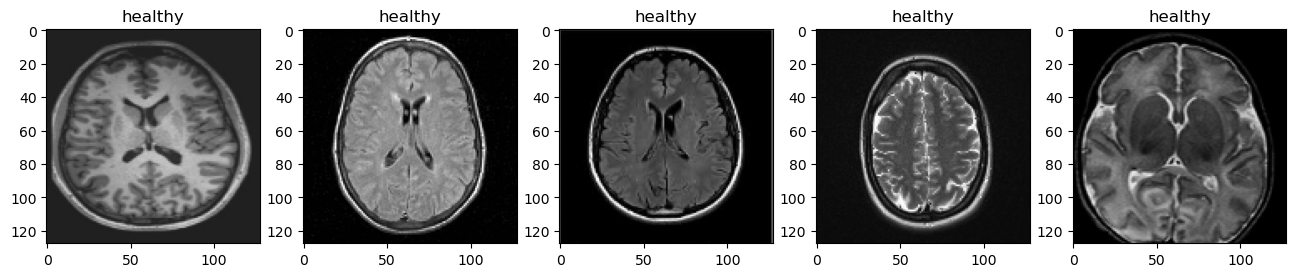

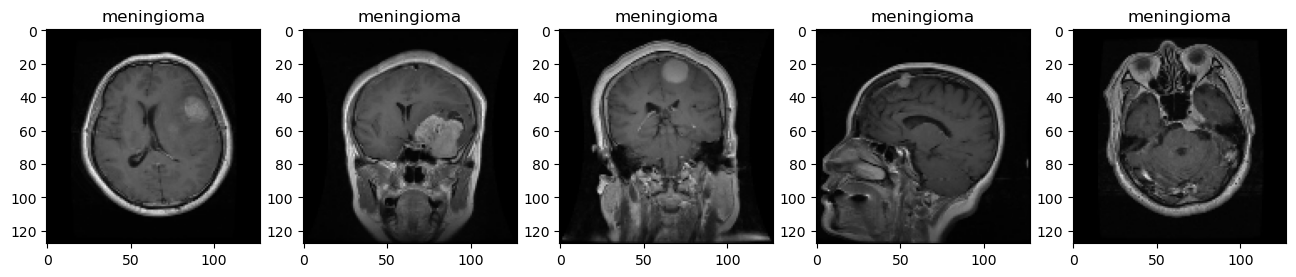

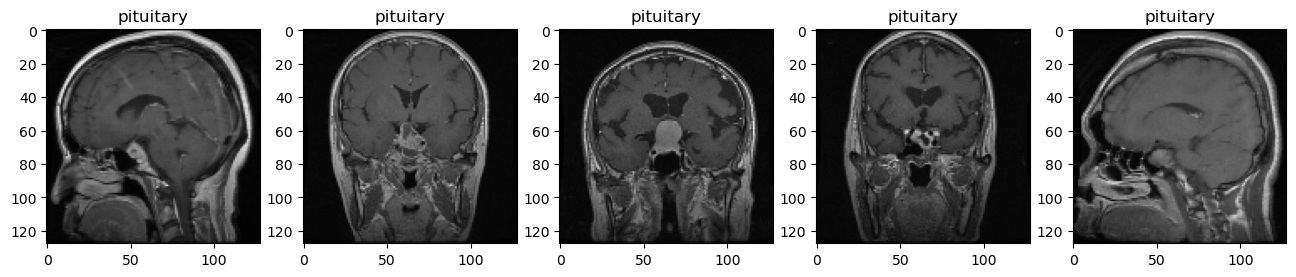

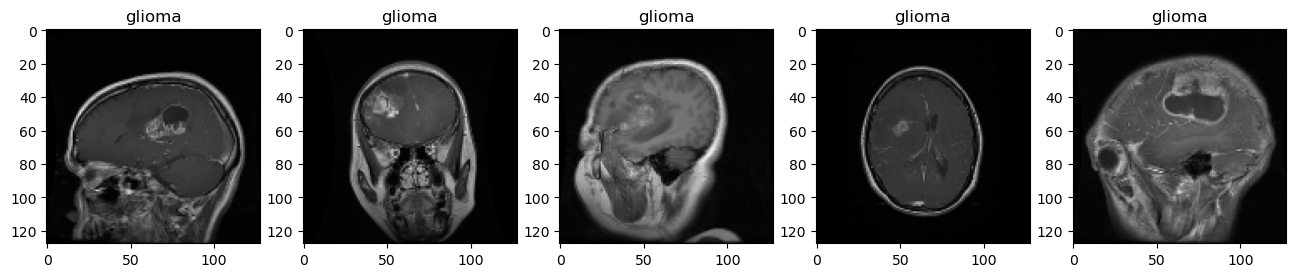

In [8]:
plot_random(train_healthy, train_meningioma, train_pituitary,train_glioma ,num=5)

In [47]:
def plot_class_distribution(classes, class_names):
    class_counts = [len(class_data) for class_data in classes]
    
    colors = ['blue', 'green', 'red', 'orange']
    
    fig = go.Figure()
    for i, class_name in enumerate(class_names):
        fig.add_trace(go.Bar(
            x=[class_name],
            y=[class_counts[i]],
            name=class_name,
            marker_color=colors[i]
        ))
    
    fig.update_layout(
        title=dict(
            text='Class Distribution in Training Data',
            x=0.5,  # Center the title
            xanchor='center'  # Anchor title to the center
        ),
        xaxis_title='Class',
        yaxis_title='Number of Samples',
        barmode='group'
    )
    
    fig.show()

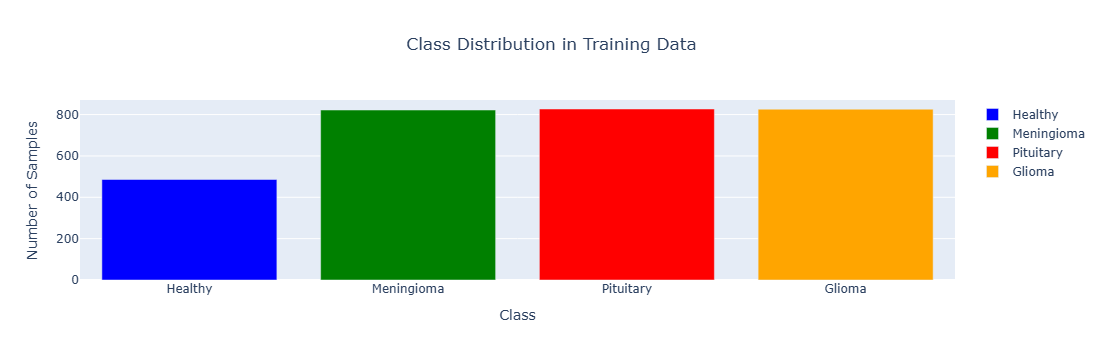

In [48]:
plot_class_distribution(
    [train_healthy, train_meningioma, train_pituitary, train_glioma],
    ['Healthy', 'Meningioma', 'Pituitary', 'Glioma']
)

### Test Data

In [21]:
test_meningioma = []
test_pituitary = []
test_glioma = []
test_healthy = []

for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Testing/meningioma_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_meningioma.append((img, 0))

for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Testing/pituitary_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_pituitary.append((img, 1))

for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Testing/glioma_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_glioma.append((img, 2))

for f in glob.iglob("C:\\Users\\sobhy\\Downloads\\brain\\Testing/no_tumor/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_healthy.append((img, 3))

In [22]:
print(f"There are {len(test_meningioma) } sample in Meningioma Class")
print(f"There are {len(test_pituitary) } sample in Pituitary Class")
print(f"There are {len(test_glioma) } sample in Glioma Class")
print(f"There are {len(test_healthy) } sample in Healthy Class")

There are 115 sample in Meningioma Class
There are 74 sample in Pituitary Class
There are 100 sample in Glioma Class
There are 105 sample in Healthy Class


In [13]:
test_meningioma = np.array(test_meningioma, dtype=object)
test_pituitary = np.array(test_pituitary, dtype=object)
test_glioma = np.array(test_glioma, dtype=object)
test_healthy = np.array(test_healthy, dtype=object)

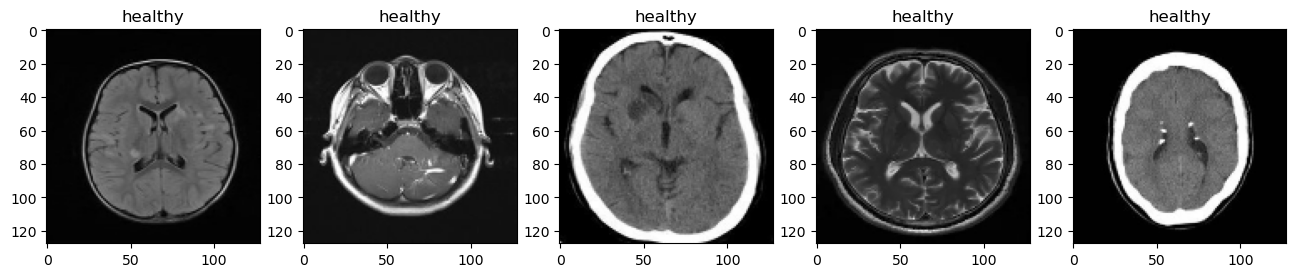

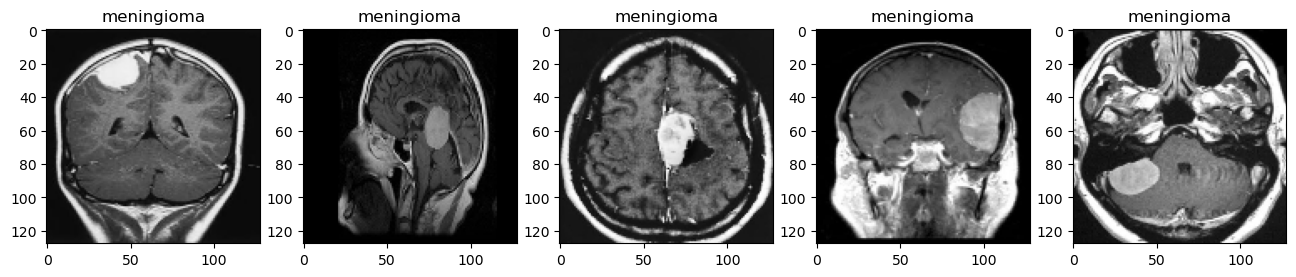

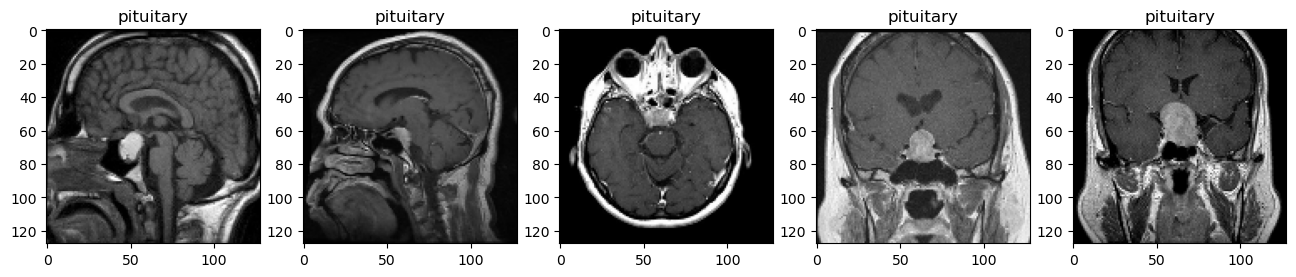

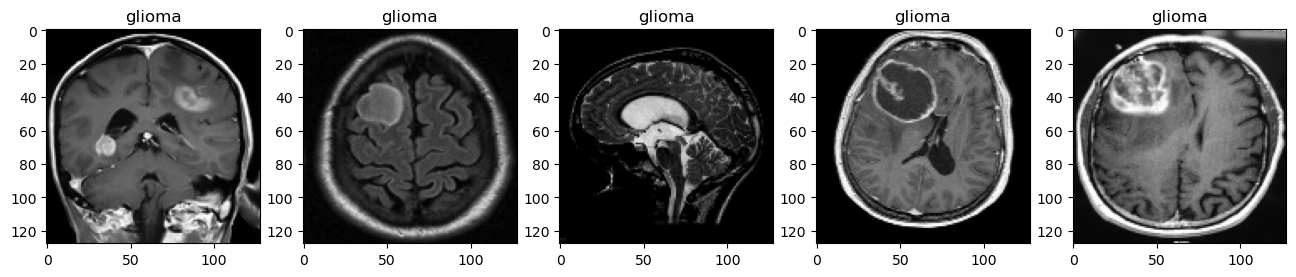

In [14]:
plot_random(test_healthy, test_meningioma, test_pituitary,test_glioma ,num=5)

In [15]:
def plot_class_distribution_pie(classes, class_names):
    class_counts = [len(class_data) for class_data in classes]
    
    colors = ['blue', 'green', 'red', 'orange']
    
    fig = go.Figure(data=[go.Pie(
        labels=class_names,
        values=class_counts,
        hole=0.3, 
        marker=dict(colors=colors)
    )])
    
    fig.update_layout(
        title=dict(
            text='Class Distribution in Test Data',
            x=0.5, 
            xanchor='center'  
        )
    )
    
    fig.show()

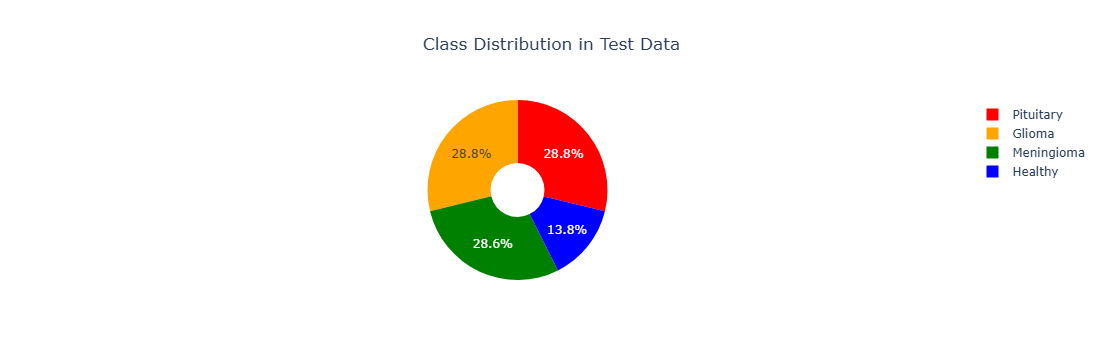

In [16]:
plot_class_distribution_pie(
    [train_healthy, train_meningioma, train_pituitary, train_glioma],
    ['Healthy', 'Meningioma', 'Pituitary', 'Glioma']
)

#### Concating The Classes Together

In [23]:
train_data = train_healthy + train_meningioma + train_pituitary + train_glioma
test_data = test_healthy + test_meningioma + test_pituitary + test_glioma

In [24]:
print(f"Total number of samples: {len(train_data)}")
print(f"Total number of test samples: {len(test_data)}")

Total number of samples: 2870
Total number of test samples: 394


#### Shuffling The Data

In [25]:
random.shuffle(train_data)
for sample in train_data[:10]:
    print( sample[1])

3
0
2
3
0
0
1
0
1
2


In [26]:
random.shuffle(test_data)
for sample in test_data[:10]:
    print( sample[1])

0
3
1
3
0
3
1
3
3
2


#### Spliting The Data  

In [61]:
# Training Data
x_train = []
y_train = [] 
for feature , label in train_data:
    x_train.append(feature)
    y_train.append(label)
x_train = np.array(x_train)
y_train = np.array(y_train)
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
x_train = x_train.astype('float32')
x_train =x_train /255.0

In [62]:
# Testing Data
x_test = []
y_test = [] 
for feature , label in test_data:
    x_test.append(feature)
    y_test.append(label)
x_test = np.array(x_test)
y_test = np.array(y_test)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)
x_test = x_test.astype('float32')
x_test =x_test /255.0

In [63]:
# Splitting the data in train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.1, random_state= 42)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(2583, 128, 128, 3)
(2583, 4)
(287, 128, 128, 3)
(287, 4)


### Baseline Model

In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data= (x_val, y_val), verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3707 - loss: 4.0381 - val_accuracy: 0.5581 - val_loss: 0.8751
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 953ms/step - accuracy: 0.7685 - loss: 0.5489 - val_accuracy: 0.8258 - val_loss: 0.4672
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 922ms/step - accuracy: 0.9621 - loss: 0.1559 - val_accuracy: 0.8516 - val_loss: 0.4063
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 894ms/step - accuracy: 0.9885 - loss: 0.0528 - val_accuracy: 0.8516 - val_loss: 0.4705
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 951ms/step - accuracy: 0.9986 - loss: 0.0214 - val_accuracy: 0.8871 - val_loss: 0.4186
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 965ms/step - accuracy: 0.9997 - loss: 0.0101 - val_accuracy: 0.8839 - val_loss: 0.4317
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8968 - val_loss: 0.4441
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 918ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 

In [76]:
_, acc = model.evaluate(x_test, y_test)
print('> %.3f' % (acc * 100.0))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6556 - loss: 5.5889
> 65.990


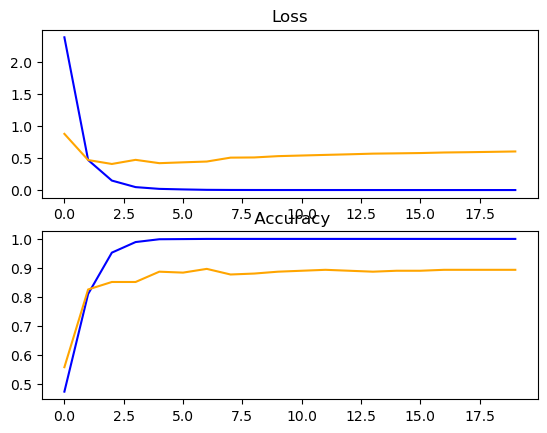

In [79]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title(' Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

### Model 2

In [84]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data= (x_val, y_val), verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.4045 - loss: 2.2319 - val_accuracy: 0.5387 - val_loss: 0.9681
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.6234 - loss: 0.8550 - val_accuracy: 0.7097 - val_loss: 0.6968
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.7386 - loss: 0.6259 - val_accuracy: 0.8032 - val_loss: 0.5582
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8353 - loss: 0.4553 - val_accuracy: 0.7742 - val_loss: 0.6236
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.8592 - loss: 0.3567 - val_accuracy: 0.8452 - val_loss: 0.4833
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9122 - loss: 0.2438 - val_accuracy: 0.8000 - val_loss: 0.6244
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9101 - loss: 0.2318 - val_accuracy: 0.8645 - val_loss: 0.4194
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9463 - loss: 0.1382 - val_accuracy: 0.9097 - val_loss:

In [86]:
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.6166 - loss: 9.0956
> 64.467


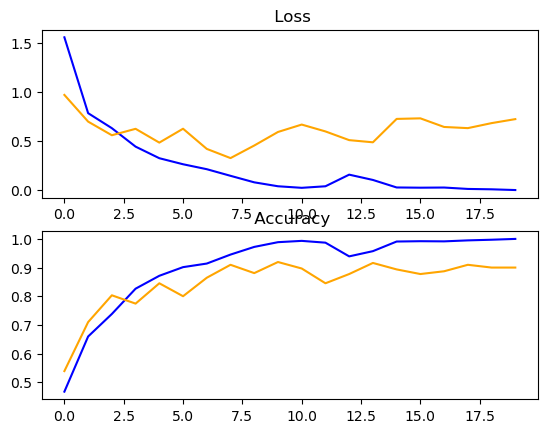

In [87]:
pyplot.subplot(211)
pyplot.title(' Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title(' Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

### Model 3

In [37]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data= (x_val, y_val), verbose=1)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.3561 - loss: 3.2993 - val_accuracy: 0.6357 - val_loss: 0.9356
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6141 - loss: 0.9058 - val_accuracy: 0.7123 - val_loss: 0.7165
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7100 - loss: 0.6799 - val_accuracy: 0.7425 - val_loss: 0.5734
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7645 - loss: 0.5752 - val_accuracy: 0.8028 - val_loss: 0.4788
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.8235 - loss: 0.4284 - val_accuracy: 0.8492 - val_loss: 0.4049
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.8534 - loss: 0.3724 - val_accuracy: 0.7981 - val_loss: 0.4743
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8605 - loss: 0.3456 - val_accuracy: 0.8515 - val_loss: 0.3756
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8946 - loss: 0.2792 - val_accuracy: 0.8677 - val_loss

In [39]:
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.6642 - loss: 5.4318
> 66.497


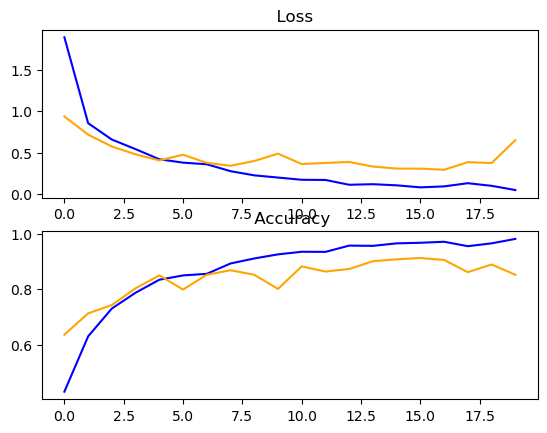

In [40]:
pyplot.subplot(211)
pyplot.title('  Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title(' Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

### Model 4

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data= (x_val, y_val), verbose=1)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4175 - loss: 4.1978 - val_accuracy: 0.6821 - val_loss: 1.7041
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6745 - loss: 1.6607 - val_accuracy: 0.7332 - val_loss: 1.4393
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7829 - loss: 1.3663 - val_accuracy: 0.7958 - val_loss: 1.2501
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8068 - loss: 1.2114 - val_accuracy: 0.7912 - val_loss: 1.1820
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8324 - loss: 1.1079 - val_accuracy: 0.8144 - val_loss: 1.1106
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 3354s 88s/step - accuracy: 0.9159 - loss: 0.9067 - val_accuracy: 0.8353 - val_loss: 1.0480
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.9348 - loss: 0.8195 - val_accuracy: 0.8469 - val_loss: 0.9935
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.9704 - loss: 0.7034 - val_accuracy: 0.7657 - val_

In [43]:
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.7165 - loss: 5.9069
> 71.574


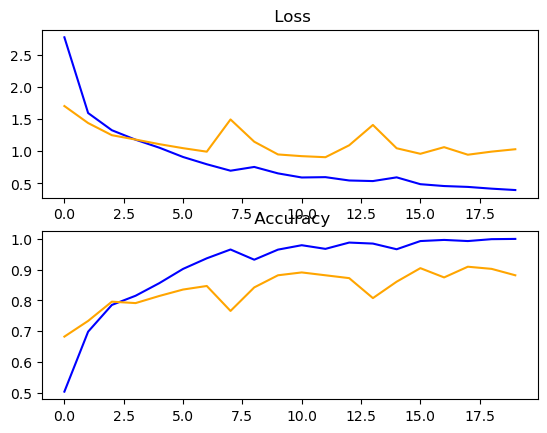

In [44]:
pyplot.subplot(211)
pyplot.title(' Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title(' Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

### Model 5

In [75]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,484,260 (17.11 MB)

 Trainable params: 4,483,108 (17.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [77]:
history = model.fit(x_train, y_train, epochs=100, validation_data= (x_val, y_val), verbose=1)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.5784 - loss: 1.2319 - val_accuracy: 0.4808 - val_loss: 1.2451
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7741 - loss: 0.5721 - val_accuracy: 0.2404 - val_loss: 1.5780
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8409 - loss: 0.4442 - val_accuracy: 0.6098 - val_loss: 1.2031
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8767 - loss: 0.3449 - val_accuracy: 0.7700 - val_loss: 0.6345
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9103 - loss: 0.2536 - val_accuracy: 0.7317 - val_loss: 0.8026
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9179 - loss: 0.2202 - val_accuracy: 0.8328 - val_loss: 0.5414
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9320 - loss: 0.1871 - val_accuracy: 0.8746 - val_loss: 0.3678
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9491 - loss: 0.1518 - val_accuracy: 0.

In [79]:
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - accuracy: 0.7308 - loss: 3.4189
> 73.858


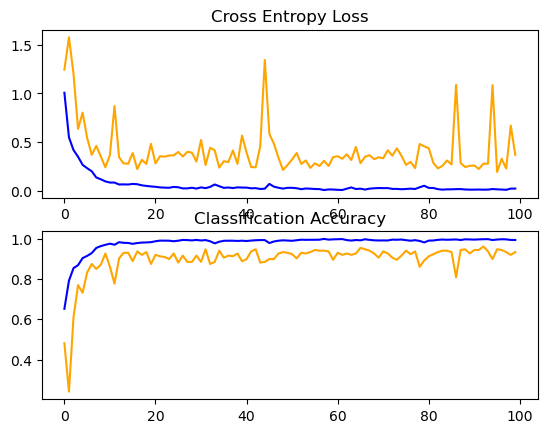

In [80]:
# Plot Loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# Plot Accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')